In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("online_retail_II.csv")


In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
#Cecking the shape of the dataset
df.shape

(1067371, 8)

In [5]:
#Checking for missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [8]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [9]:
# Looking for negative quantities
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
#² Converting Invoice column to string type
df["Invoice"]=df["Invoice"].astype('str')

In [11]:
# Looking for invoices that do not match the expected format (6 digit numbers)
df[df['Invoice'].str.match('^\\d{6}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
# Checking how many invoices start with 'A' or 'C'
df[df['Invoice'].str.startswith('A') | df['Invoice'].str.startswith('C')].shape
# Checking for non-numeric characters removed from Invoice column
df["Invoice"].str.replace('[0-9]', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
# Checking invoices that start with 'A'
df[df["Invoice"].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [14]:
df['StockCode'] = df['StockCode'].astype('str')
# Looking for StockCodes that do not match the expected format (5 digit numbers or 5 digit numbers followed by letters)
df[(df["StockCode"].str.match('\\d{5}$')==False) & (df["StockCode"].str.match('^\\d{5}[a-zA-Z]+$')==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [15]:
# Looking for StockCodes that start with 'DOT'
df[df["StockCode"].str.contains('^DOT')]["Description"].unique()

array(['DOTCOM POSTAGE', nan], dtype=object)

In [16]:
# Looking for StockCodes that start with 'DCGS0068'
df[df["StockCode"].str.contains('^DCGS0068')]["Description"].unique()

array(['DOGS NIGHT COLLAR', 'ebay'], dtype=object)

In [17]:
# Looking for StockCodes that start with 'M'
df[df["StockCode"].str.contains('^M')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


Data Cleaning

In [18]:
# Creating a copy of the original dataframe
cleaned_df=df.copy()

In [19]:
#Removing rows with invoices that do not match the expected format (6 digit numbers)
cleaned_df["Invoice"]=cleaned_df["Invoice"].astype('str')
mask=(cleaned_df["Invoice"].str.match('^\\d{6}$')==True)

cleaned_df=cleaned_df[mask]

In [20]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [21]:
# Removing rows with StockCodes that do not match the expected format (5 digit numbers or 5 digit numbers followed by letters)
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask2=(cleaned_df["StockCode"].str.match('\\d{5}$')==True) | (cleaned_df["StockCode"].str.match('^\\d{5}[a-zA-Z]+$')==True) | (cleaned_df["StockCode"].str.contains('^PADS'))

cleaned_df=cleaned_df[mask2]

In [22]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [23]:
# Dropping rows with missing Customer ID
cleaned_df.dropna(subset=['Customer ID'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26088\3965994696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'], inplace=True)


In [24]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,802711.000000,802711.000000,802711.000000
mean,13.336280,2.930474,15338.065410
std,144.542222,4.275804,1693.929085
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13988.000000
50%,5.000000,1.950000,15276.000000
75%,12.000000,3.750000,16809.000000
max,80995.000000,649.500000,18287.000000


In [25]:
cleaned_df.shape

(802711, 8)

In [26]:
len(cleaned_df[cleaned_df["Price"]==0])

62

In [27]:
# Removing rows with Price less than or equal to 0
cleaned_df=cleaned_df[cleaned_df["Price"]>=0]

In [28]:
#How Much data is lost during cleaning 
len(cleaned_df)/len(df)

0.7520449778005961

25% Dropped

Feature Engineering

In [29]:
# Creating a new column 'SalesLinetotal' as Quantity multiplied by Price
cleaned_df["SalesLinetotal"]=cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLinetotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [30]:
aggregated_df=cleaned_df.groupby('Customer ID',as_index=False)\
    .agg(MonetaryValue=('SalesLinetotal','sum'),
         Frequency=('Invoice','nunique'),
         LastInvoiceDate=('InvoiceDate', "max") )
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77352.96,3,2011-01-18 10:01:00
1,12347.0,5633.32,8,2011-12-07 15:52:00
2,12348.0,1658.40,5,2011-09-25 13:13:00
3,12349.0,3678.69,3,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
...,...,...,...,...
5848,18283.0,2730.70,22,2011-12-06 12:02:00
5849,18284.0,411.68,1,2010-10-04 11:33:00
5850,18285.0,377.00,1,2010-02-17 10:24:00
5851,18286.0,1246.43,2,2010-08-20 11:57:00


In [31]:
max_invoice_date= aggregated_df['LastInvoiceDate'].max()
max_invoice_date

'2011-12-09 12:50:00'

In [32]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      5853 non-null   float64
 1   MonetaryValue    5853 non-null   float64
 2   Frequency        5853 non-null   int64  
 3   LastInvoiceDate  5853 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 183.0+ KB


In [33]:
# Calculating Recency as the number of days since the last invoice date
aggregated_df['Recency'] =(pd.to_datetime(max_invoice_date) - pd.to_datetime(aggregated_df['LastInvoiceDate'])).dt.days
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77352.96,3,2011-01-18 10:01:00,325
1,12347.0,5633.32,8,2011-12-07 15:52:00,1
2,12348.0,1658.40,5,2011-09-25 13:13:00,74
3,12349.0,3678.69,3,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309
...,...,...,...,...,...
5848,18283.0,2730.70,22,2011-12-06 12:02:00,3
5849,18284.0,411.68,1,2010-10-04 11:33:00,431
5850,18285.0,377.00,1,2010-02-17 10:24:00,660
5851,18286.0,1246.43,2,2010-08-20 11:57:00,476


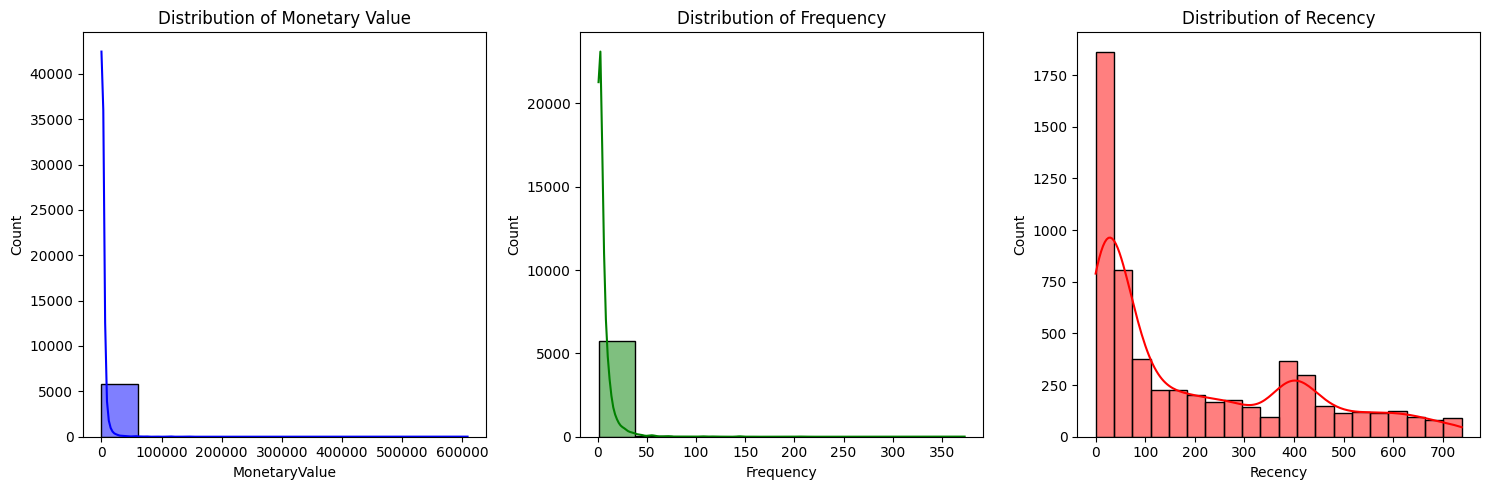

In [34]:
#Histograms to ckeck distributions
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(aggregated_df['MonetaryValue'], bins=10, kde=True,color='blue')
plt.title('Distribution of Monetary Value')

plt.subplot(1,3,2)
sns.histplot(aggregated_df['Frequency'], bins=10, kde=True,color='green')
plt.title('Distribution of Frequency')

plt.subplot(1,3,3)
sns.histplot(aggregated_df['Recency'], bins=20, kde=True,color='red')
plt.title('Distribution of Recency')

plt.tight_layout()
plt.show()

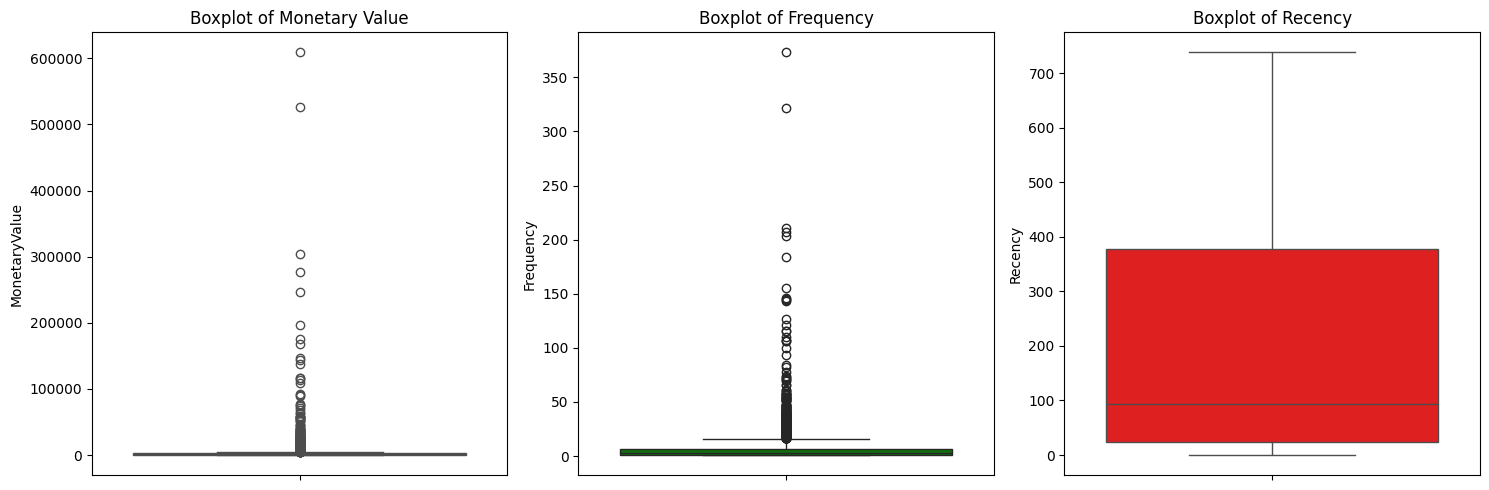

In [35]:
#using boxplots to check for outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=aggregated_df['MonetaryValue'], color='blue')
plt.title('Boxplot of Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(y=aggregated_df['Frequency'], color='green')
plt.title('Boxplot of Frequency')

plt.subplot(1,3,3)
sns.boxplot(y=aggregated_df['Recency'], color='red')
plt.title('Boxplot of Recency')

plt.tight_layout()
plt.show()

In [36]:
#Getting rid of outliers using IQR method for monetary value
MQ1 = aggregated_df[['MonetaryValue']].quantile(0.25)
MQ3 = aggregated_df[['MonetaryValue']].quantile(0.75)
MIQR = MQ3 - MQ1

monetary_outliers= aggregated_df[(aggregated_df['MonetaryValue'] < (MQ1['MonetaryValue'] - 1.5 * MIQR['MonetaryValue'])) | (aggregated_df['MonetaryValue'] > (MQ3['MonetaryValue'] + 1.5 * MIQR['MonetaryValue']))]


In [37]:
monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,620.000000,620.000000,620.000000,620.000000
mean,15077.782258,18260.636545,25.985484,50.983871
std,1754.422990,41750.244214,31.138205,102.874077
min,12346.000000,5217.440000,1.000000,0.000000
25%,13573.000000,6591.865000,12.000000,4.000000
50%,14924.000000,9131.805000,18.000000,16.000000
75%,16607.500000,14486.350000,29.000000,47.250000
max,18260.000000,608821.650000,373.000000,691.000000


In [38]:
#Getting rid of outliers using IQR method for frequency value
FQ1 = aggregated_df[['Frequency']].quantile(0.25)
FQ3 = aggregated_df[['Frequency']].quantile(0.75)
FIQR = FQ3 - FQ1
frequency_outliers = aggregated_df[(aggregated_df['Frequency'] < (FQ1['Frequency'] - 1.5 * FIQR['Frequency'])) | (aggregated_df['Frequency'] > (FQ3['Frequency'] + 1.5 * FIQR['Frequency']))]



In [39]:
frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,424.000000,424.000000,424.000000,424.000000
mean,15373.747642,21143.851403,34.872642,30.787736
std,1777.616900,49369.498858,34.685385,70.627095
min,12415.000000,1820.440000,17.000000,0.000000
25%,13851.000000,6368.085000,20.000000,2.750000
50%,15306.000000,9760.710000,25.000000,9.000000
75%,16947.250000,16691.300000,35.000000,24.000000
max,18283.000000,608821.650000,373.000000,575.000000


In [40]:
non_outlier_df = aggregated_df[~aggregated_df.index.isin(monetary_outliers.index) & ~aggregated_df.index.isin(frequency_outliers.index)]

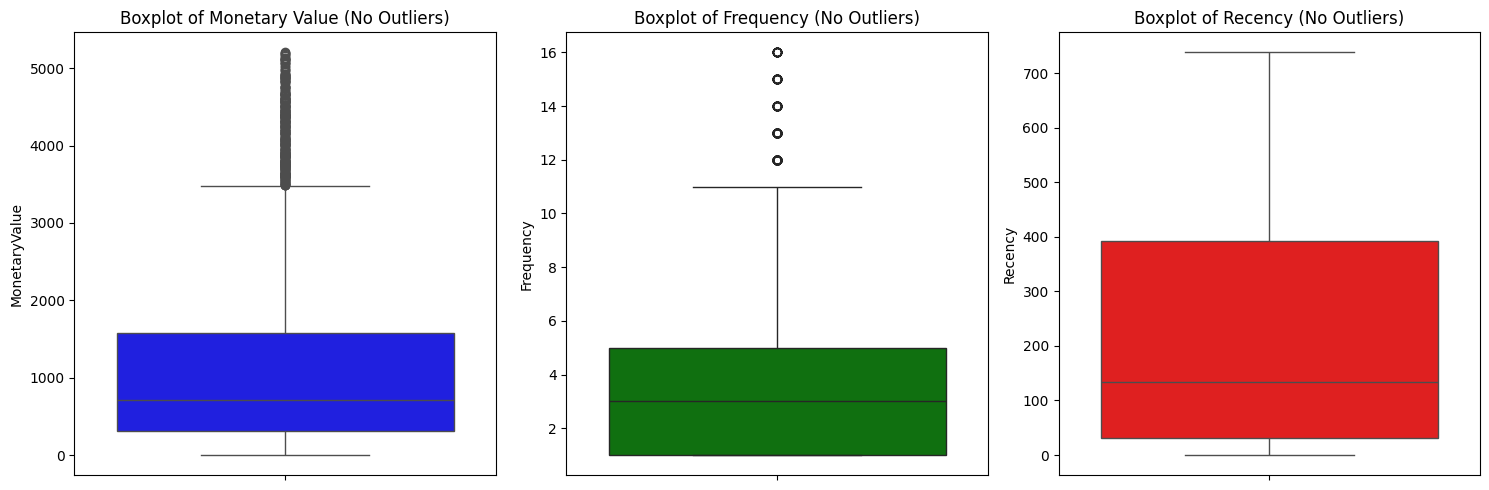

In [41]:
#recreating boxplots to check for outliers after removing them
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(y=non_outlier_df['MonetaryValue'], color='blue')
plt.title('Boxplot of Monetary Value (No Outliers)')
plt.subplot(1,3,2)
sns.boxplot(y=non_outlier_df['Frequency'], color='green')
plt.title('Boxplot of Frequency (No Outliers)')
plt.subplot(1,3,3)
sns.boxplot(y=non_outlier_df['Recency'], color='red')
plt.title('Boxplot of Recency (No Outliers)')

plt.tight_layout()
plt.show()

3D Visulaization

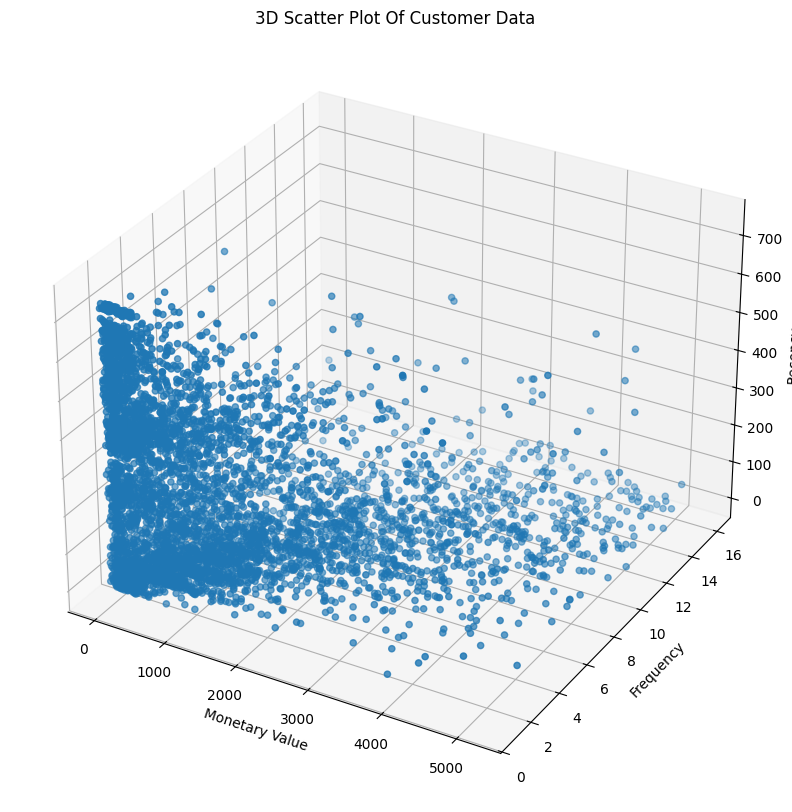

In [42]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(non_outlier_df["MonetaryValue"],non_outlier_df["Frequency"],non_outlier_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.tight_layout()
ax.set_title("3D Scatter Plot Of Customer Data")
plt.show()


In [43]:
#Scaling Features
scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_outlier_df[['MonetaryValue','Frequency','Recency']])
scaled_data

array([[ 0.46515388,  0.41043407, -0.68620646],
       [ 2.25482071, -0.21563538, -0.95148751],
       [-0.74314075, -0.84170482,  0.42702652],
       ...,
       [-0.66996983, -0.84170482,  2.08977026],
       [ 0.10021169, -0.5286701 ,  1.21813252],
       [ 2.65726077,  1.03650352, -0.83779563]], shape=(5168, 3))

In [44]:
scaled_data_df=pd.DataFrame(scaled_data,index=non_outlier_df.index,columns=("MonetaryValue","Frequency","Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.465154,0.410434,-0.686206
3,2.254821,-0.215635,-0.951488
4,-0.743141,-0.841705,0.427027
5,-0.737356,-0.841705,0.734942
6,0.528173,1.662573,-0.870956
...,...,...,...
5847,-0.846209,-0.528670,-1.003596
5849,-0.639249,-0.841705,1.004960
5850,-0.669970,-0.841705,2.089770
5851,0.100212,-0.528670,1.218133


Kmeans Clustering


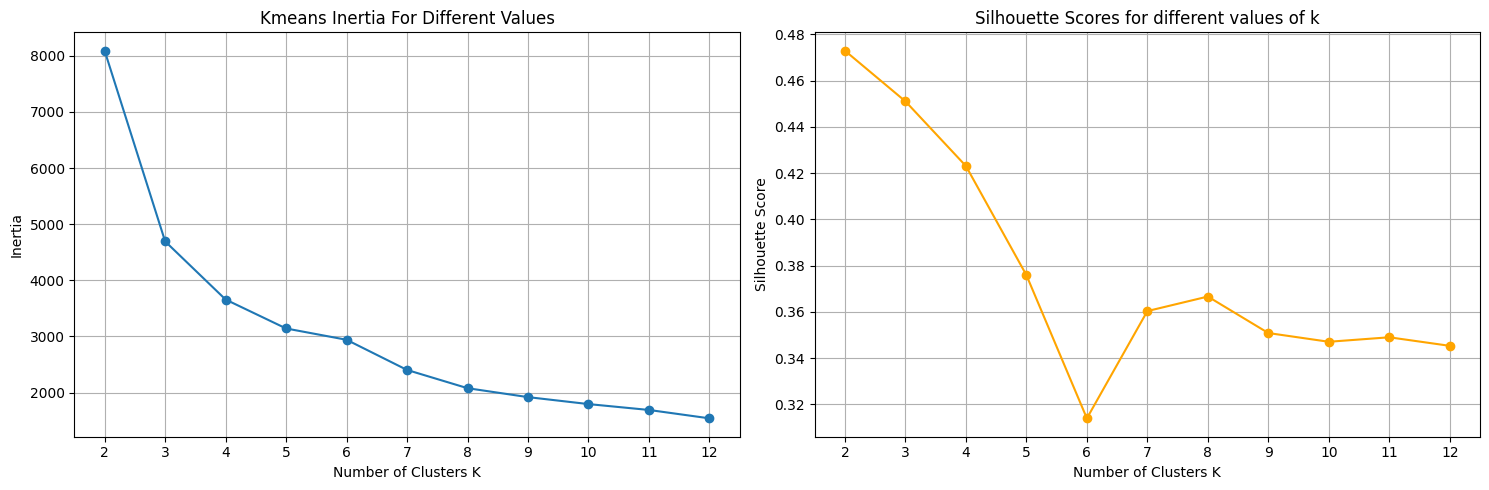

In [53]:
from sklearn.metrics import silhouette_score
max_k=12

inertia=[]
silhouettes_score=[]
k_values=range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    cluster_labels=kmeans.fit_predict(scaled_data_df)
    sil_score=silhouette_score(scaled_data_df,cluster_labels)
    silhouettes_score.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker="o")
plt.title("Kmeans Inertia For Different Values")
plt.xlabel("Number of Clusters K")
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values,silhouettes_score,marker="o",color='orange')
plt.title("Silhouette Scores for different values of k")
plt.xlabel("Number of Clusters K")
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()





In [54]:
kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 2, 3, ..., 3, 3, 1], shape=(5168,), dtype=int32)

In [55]:
non_outlier_df["Cluster"]=cluster_labels
non_outlier_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26088\576458525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df["Cluster"]=cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.0,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.0,294.40,1,2011-02-02 16:01:00,309,3
5,12351.0,300.93,1,2010-11-29 15:23:00,374,3
6,12352.0,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5847,18282.0,178.05,2,2011-12-02 11:43:00,7,0
5849,18284.0,411.68,1,2010-10-04 11:33:00,431,3
5850,18285.0,377.00,1,2010-02-17 10:24:00,660,3
5851,18286.0,1246.43,2,2010-08-20 11:57:00,476,3


Analysis

In [57]:
cluster_colors={0:"Blue",1:"Orange",2:"Green",3:"Red"}

colors=non_outlier_df["Cluster"].map(cluster_colors)

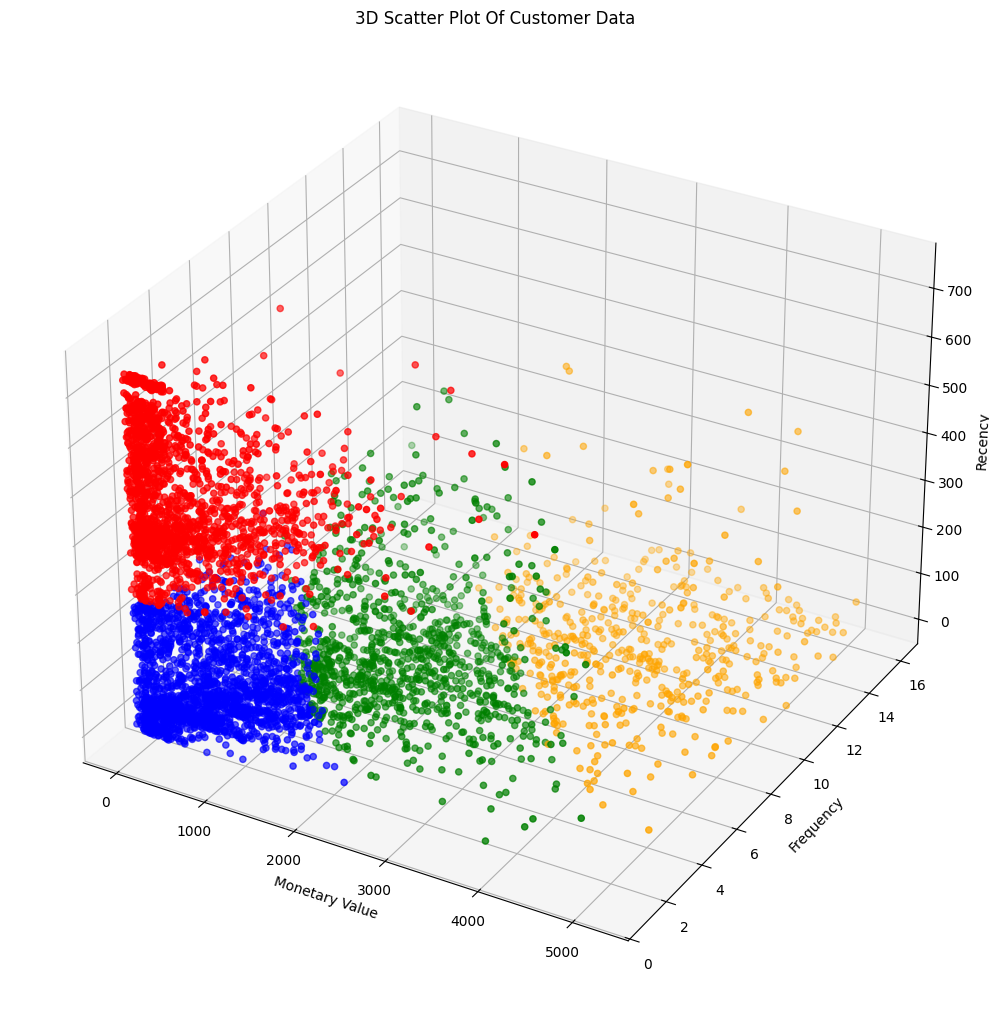

In [58]:
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(non_outlier_df["MonetaryValue"],non_outlier_df["Frequency"],non_outlier_df["Recency"],c=colors,marker="o")

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.tight_layout()
ax.set_title("3D Scatter Plot Of Customer Data")
plt.show()

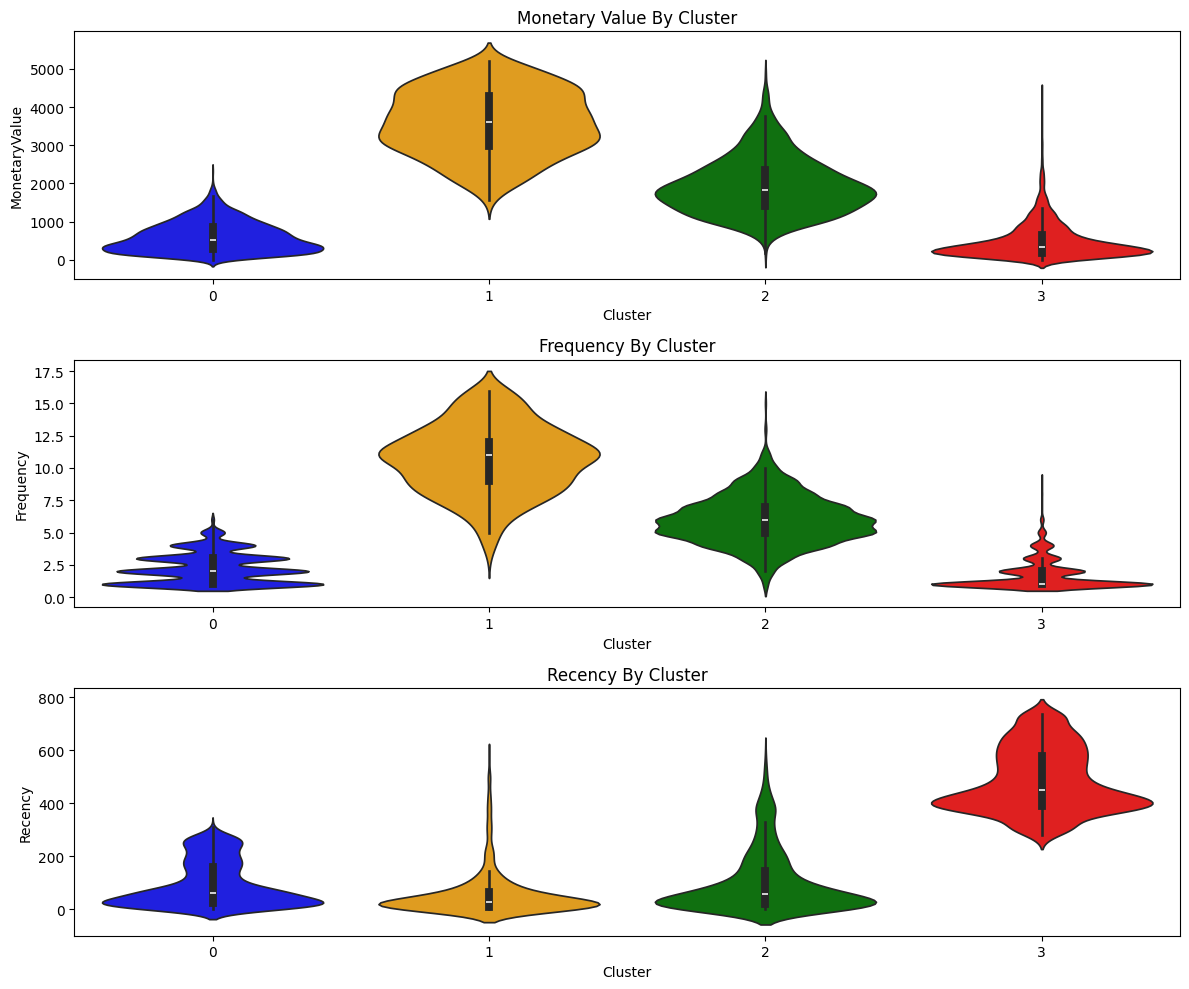

In [ ]:
#Violin Plots For deeper analysis

plt.figure(figsize=(12, 10))

# 1. Monetary Value
plt.subplot(3, 1, 1)
sns.violinplot(data=non_outlier_df, x='Cluster', y='MonetaryValue', palette=cluster_colors, hue='Cluster', legend=False)
plt.title("Monetary Value By Cluster")

# 2. Frequency
plt.subplot(3, 1, 2)
sns.violinplot(data=non_outlier_df, x='Cluster', y='Frequency', palette=cluster_colors, hue='Cluster', legend=False)
plt.title("Frequency By Cluster")

# 3. Recency
plt.subplot(3, 1, 3)
sns.violinplot(data=non_outlier_df, x='Cluster', y='Recency', palette=cluster_colors, hue='Cluster', legend=False)
plt.title("Recency By Cluster")

plt.tight_layout()
plt.show()

Cluster 1 (Orange): The VIPs / Champions
These are your most valuable customers. They spend the most (High Monetary), shop most often (High Frequency), and visited very recently (Low Recency).

Advice:  Retention is Key: Do not overwhelm them with discount coupons; they already see the value in your brand.

Exclusivity: Offer "early access" to new products or a premium loyalty tier.

Referral Programs: These customers are your best brand advocates. Incentivize them to bring in new customers.

Cluster 2 (Green): Loyal/Active Shoppers
These are consistent customers. They have moderate-to-high spending and frequency, with very low recency (meaning they are currently active).

Advice:  Upsell: Since they are active and frequent, try to increase their average order value (Monetary) through personalized product recommendations ("Frequently bought together").

Subscription Models: If applicable, move these customers to a subscription or recurring delivery model to lock in their loyalty.

Cluster 0 (Blue): New or Occasional Shoppers
These customers have low spending and low frequency, but their Recency is very low (they just visited). They are likely brand-new customers or very occasional "one-off" buyers.

Advice:  Onboarding: Focus on a strong "Welcome" email sequence or a first-purchase follow-up.

Nurture: Provide educational content about your products to encourage a second purchase, moving them toward the Green or Orange clusters.

Cluster 3 (Red): At-Risk / Churning Customers
This is your "danger zone." While they have some spending history, their Recency is extremely high (many haven't shopped in 400–800 days). They have essentially stopped interacting with the brand.

Advice:  Win-Back Campaigns: Use aggressive "We Miss You" discounts or limited-time offers to bring them back.

Feedback Surveys: Send a survey to understand why they left. Was it a bad experience or a price issue?

Re-Targeting: If they don't respond to emails, use social media re-targeting ads to remind them of the brand.

In [64]:
overlap_indices=monetary_outliers.index.intersection(frequency_outliers.index)

In [65]:
monetary_only_outliers=monetary_outliers.drop(overlap_indices)

In [66]:
frequency_only_outliers=frequency_outliers.drop(overlap_indices)

In [67]:
monetary_and_frequency_outliers=monetary_outliers.loc[overlap_indices]

In [68]:
monetary_only_outliers['Cluster']=-1
frequency_only_outliers["Cluster"]=-2
monetary_and_frequency_outliers["Cluster"]=-3

outier_clusters_df=pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])
outier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77352.96,3,2011-01-18 10:01:00,325,-1
1,12347.0,5633.32,8,2011-12-07 15:52:00,1,-1
10,12356.0,5613.68,6,2011-11-17 08:40:00,22,-1
11,12357.0,17437.66,2,2011-11-06 16:07:00,32,-1
13,12359.0,8935.94,10,2011-10-13 12:47:00,57,-1
...,...,...,...,...,...,...
5791,18226.0,11878.88,26,2011-10-26 13:36:00,43,-3
5794,18229.0,10803.71,28,2011-11-28 09:48:00,11,-3
5796,18231.0,6875.07,28,2011-05-31 14:18:00,191,-3
5810,18245.0,6324.98,20,2011-12-02 14:48:00,6,-3


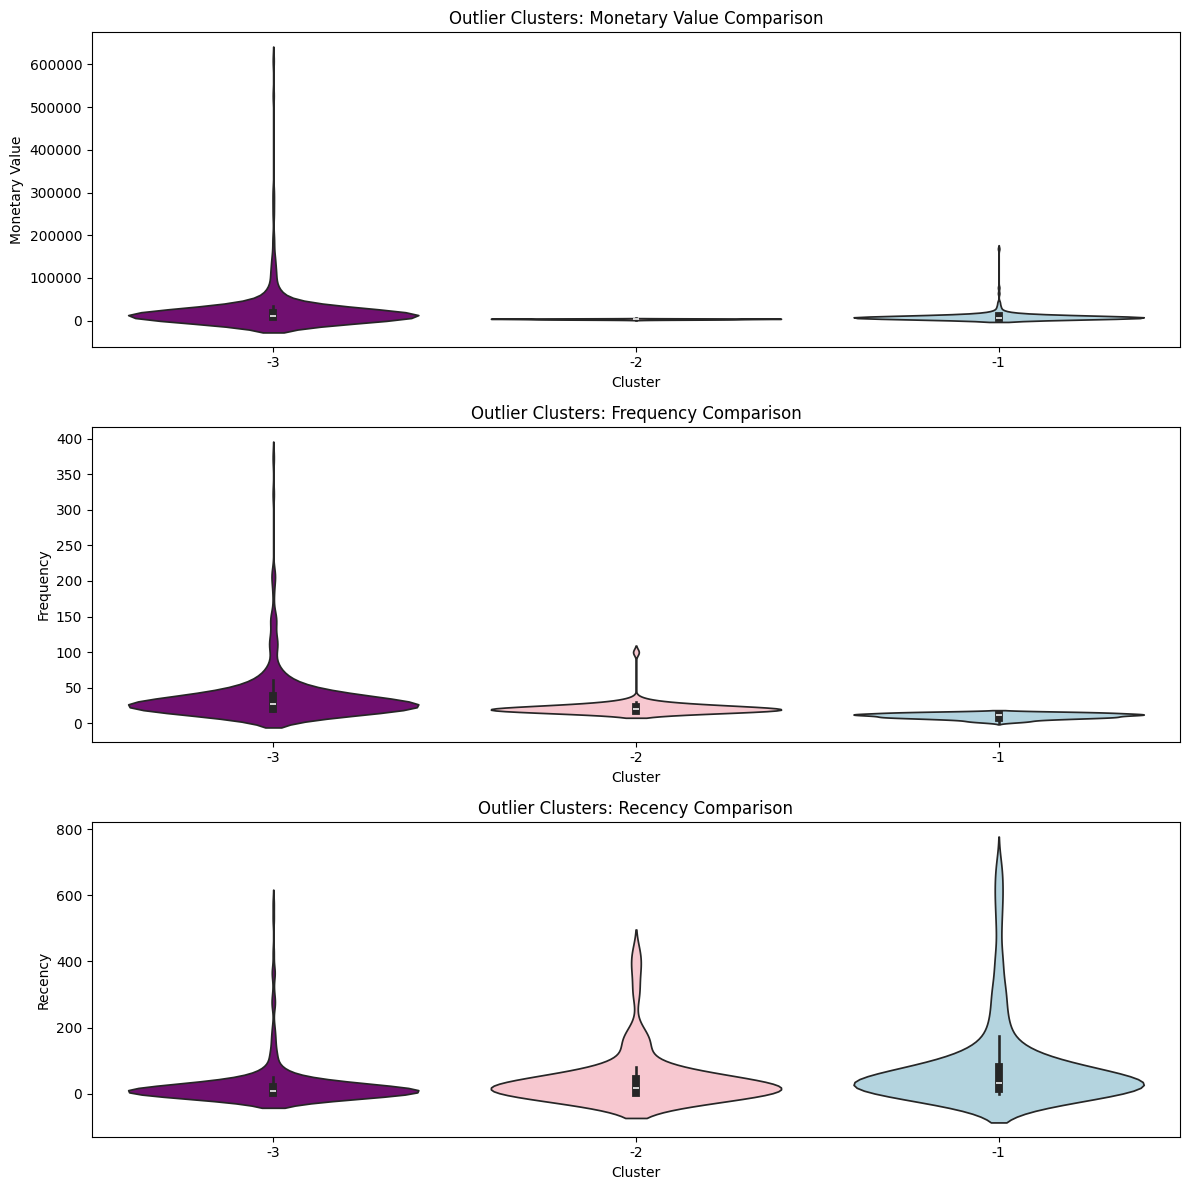

In [70]:
outlier_colors = {-1: "lightblue", -2: "pink", -3: "purple"}

plt.figure(figsize=(12, 12))

# 1. Monetary Value By Outlier Cluster
plt.subplot(3, 1, 1)
sns.violinplot(data=outier_clusters_df, x='Cluster', y='MonetaryValue', 
               palette=outlier_colors, hue='Cluster', legend=False)
plt.title("Outlier Clusters: Monetary Value Comparison")
plt.ylabel("Monetary Value")

# 2. Frequency By Outlier Cluster
plt.subplot(3, 1, 2)
sns.violinplot(data=outier_clusters_df, x='Cluster', y='Frequency', 
               palette=outlier_colors, hue='Cluster', legend=False)
plt.title("Outlier Clusters: Frequency Comparison")
plt.ylabel("Frequency")

# 3. Recency By Outlier Cluster
plt.subplot(3, 1, 3)
sns.violinplot(data=outier_clusters_df, x='Cluster', y='Recency', 
               palette=outlier_colors, hue='Cluster', legend=False)
plt.title("Outlier Clusters: Recency Comparison")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

Cluster -3: The "Super-Whales" (Monetary & Frequency Outliers)
These are your most critical individuals. They shop more often than anyone else and spend massive amounts, with some reaching over $600,000 in monetary value and 400 transactions.

Analysis: They have very low recency, meaning they are highly engaged right now.

Advice:  White-Glove Service: Assign a dedicated account manager or personal shopper to this group.

Direct Feedback: Interview them to understand what they love about the brand; their insights are the blueprint for your future growth.

Avoid Generic Mass Marketing: Ensure they never receive basic "10% off" coupons, which can cheapen the brand for a high-spender.

Cluster -2: The "High-Engagement Enthusiasts" (Frequency Outliers)
These customers shop very frequently (peaking around 100 transactions) but their spending per visit is relatively low.

Analysis: They have moderate recency. They are consistent, but perhaps they only buy small or low-margin items.

Advice:  Increase Basket Size: Use "Frequently Bought Together" bundles or tiered discounts (e.g., "Spend $50 more to get free shipping") to push their Monetary Value higher.

Loyalty Gamification: Since they shop often, they are perfect for a points-based loyalty program where they can earn small rewards for every 5th or 10th visit.

Cluster -1: The "Legacy High-Spenders" (Monetary Outliers)
This group contains people who have spent significantly in the past (up to $200,000), but their Recency plot shows a very long "tail" reaching up to 800 days.

Analysis: Many of these high-value individuals are at risk of never coming back.

Advice:  Urgent Win-Back: This is your highest-priority group for a "re-activation" campaign.

Personalized Outreach: A physical card or a personalized email from an executive can be effective for high-monetary outliers who haven't visited in a year.

Investigation: Check if their primary contact person at the company left or if a specific high-end product they used to buy was discontinued.

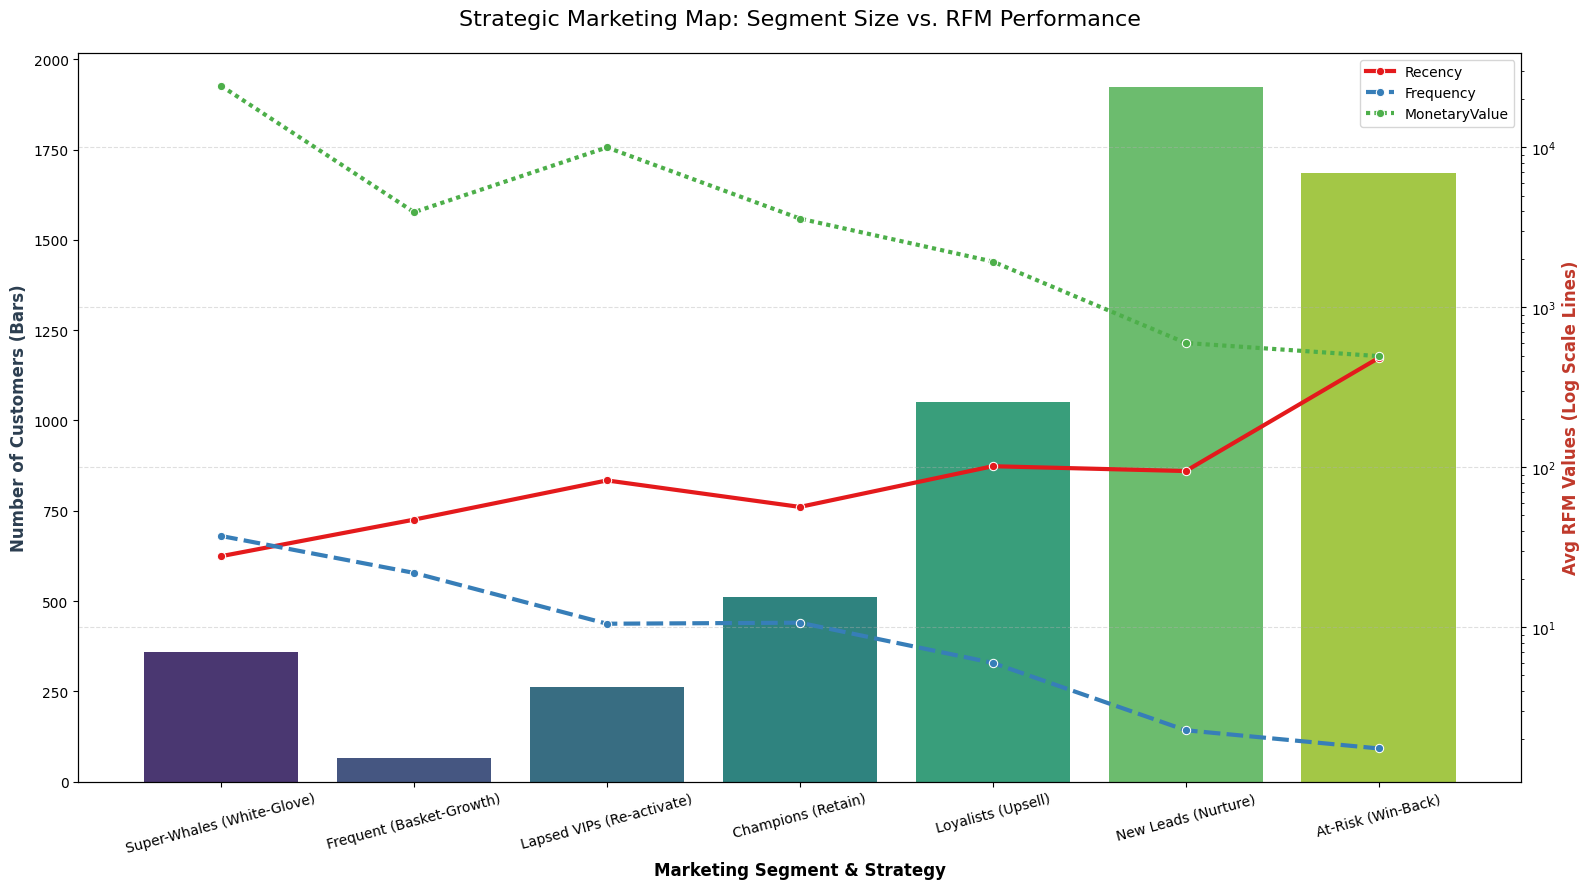

In [ ]:
full_clustering_df = pd.concat([non_outlier_df, outier_clusters_df])

# 2. Define the Marketing Mapping based on our analysis
marketing_map = {
    1: "Champions (Retain)",
    2: "Loyalists (Upsell)",
    0: "New Leads (Nurture)",
    3: "At-Risk (Win-Back)",
    -3: "Super-Whales (White-Glove)",
    -2: "Frequent (Basket-Growth)",
    -1: "Lapsed VIPs (Re-activate)"
}

# 3. Apply the labels
full_clustering_df['Marketing_Effort'] = full_clustering_df['Cluster'].map(marketing_map)

# 4. Aggregate the data for the plot
# We sort by the original Cluster ID to keep the logical order on the X-axis
effort_order = [-3, -2, -1, 1, 2, 0, 3]
category_order = [marketing_map[k] for k in effort_order]

stats = full_clustering_df.groupby('Marketing_Effort').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Customer_Count'}).reindex(category_order)

# 5. Create the Dual-Axis Plot
fig, ax1 = plt.subplots(figsize=(16, 9))

# Primary Axis: Bars for Customer Volume
sns.barplot(x=stats.index, y=stats['Customer_Count'], ax=ax1, palette='viridis', hue=stats.index, legend=False)
ax1.set_ylabel('Number of Customers (Bars)', fontsize=12, fontweight='bold', color='#2c3e50')
ax1.set_xlabel('Marketing Segment & Strategy', fontsize=12, fontweight='bold')
ax1.set_title('Strategic Marketing Map: Segment Size vs. RFM Performance', fontsize=16, pad=20)
plt.xticks(rotation=15)

# Secondary Axis: Lines for RFM Metrics
ax2 = ax1.twinx()
# We use a log scale so that Monetary (thousands) and Frequency (units) are both visible
sns.lineplot(data=stats[['Recency', 'Frequency', 'MonetaryValue']], ax=ax2, marker='o', linewidth=3, palette='Set1')
ax2.set_yscale('log')
ax2.set_ylabel('Avg RFM Values (Log Scale Lines)', fontsize=12, fontweight='bold', color='#c0392b')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()